<!-- Image ou logo de l'institution (facultatif) -->
<div style="text-align: center; margin-top: 50px;">
    <img src="ENSAE.png" width = 200>
    <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: center; margin: 20px 0;color: blue;">ECOLE NATIONALE DE LA STATISTIQUE ET DE L'ANALYSE ECONOMIQUE</p>
    <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: center; margin: 20px 0;color: blue;">PIERRE NDIAYE ENSAE-Dakar</p>
</div>

<!-- Titre principal de la page -->
<div style="text-align: center; margin-top: 100px;">
   <h1 style="font-size: 50px; color: tomato;">Projet MACHINE LEARNING 2</h1>

</div>

<!-- Sous-titre ou description -->
<div style="text-align: center; margin-top: 50px;">
    <h2 style="font-size: 30px; color: blue;">Dubaï Mall: Segmentation de la clientèle</h2>
</div>

<!-- Présenté par section -->
<div style="background-color:lightblue; padding: 50px; text-align: left; font-family: Arial, sans-serif; border-radius: 15px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-top: 50px;">
    <span style="font-size: 20px; color: black; font-weight: bold;">
    <strong>Présenté par</strong> : <br>
    Oumar Farouk MOUSSA MAHAMDOU  <br>
    Deborah MANDO <br>
    Inoussa ZAONGO <br>
    Zoumana ZERBO<br>
</span>
 <p style="font-size: 30px; color: #2a4d69; width: 100%; text-align: right; margin: 20px 0;color: blue;">
    Sous la supervision de : <br>
    Mme Mously DIAW <br>
    Data scientist, auto entrepreneure <br>
    Enseignante à l'ENSAE <br>
     </p>
</div>
                            
<div style="width:100%;text-align: center;">
<strong>Juin 2025</strong>
    </div>

# <span style="color:blue">Chargement des librairies necessaires</span>

In [374]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go

# Prétraitement des données
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

# Réduction de dimensionnalité
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Méthodes de clustering
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes

# Évaluation des clusters
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
    homogeneity_score,
    adjusted_rand_score,
    adjusted_mutual_info_score,
    pairwise_distances
)

# Visualisation des clusters (Yellowbrick)
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

# Clustering hiérarchique (SciPy)
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
from scipy.stats import mannwhitneyu

# Divers
import warnings
from time import time
from itertools import product
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns
import dill




# <span style="color:blue"> Introduction </span>

Dans un environnement économique globalisé où la concurrence devient chaque jour plus intense, les entreprises se tournent de plus en plus vers l’exploitation des données comme levier stratégique pour améliorer leurs performances commerciales. Une utilisation pertinente de ces données leur permet non seulement de comprendre de manière précise les besoins spécifiques de leurs clients, mais aussi de détecter des tendances émergentes et de concevoir des stratégies plus ciblées et efficaces.

L’émergence des technologies analytiques, et en particulier des techniques de Machine Learning, a considérablement transformé les capacités des entreprises à exploiter ces vastes ensembles de données. Ces technologies permettent de convertir des informations brutes en données exploitables, fournissant des insights cruciaux pour la segmentation des clients, la personnalisation des offres et l’optimisation des opérations commerciales.

Dans ce contexte, Dubaï Mall, l’un des plus grands centres commerciaux au monde,  un cadre d’étude idéal pour appliquer ces méthodes avancées d’analyse comportementale. La diversité et la complexité des profils clients de Dubaï Mall posent en effet un défi important pour ses stratégies commerciales et marketing. Comprendre les dynamiques qui influencent les décisions d’achat, telles que les niveaux de revenu ou les préférences de consommation, est essentiel pour concevoir des campagnes marketing ciblées et améliorer l’efficacité des offres. C’est dans ce cadre que la segmentation de la clientèle prend toute sa pertinence.

Ce projet de Machine Learning s’inscrit précisément dans cette dynamique en se concentrant sur la segmentation de la clientèle de Dubaï Mall. L’objectif principal est de développer des modèles algorithmiques permettant de diviser les clients en groupes homogènes selon des critères clés tels que l’âge, le revenu annuel et le score de dépenses.

Le plan de ce travail est structuré comme suit : dans un premier temps, nous procéderons au traitement et à l’analyse descriptive des données. Ensuite, nous appliquerons des techniques de segmentation non supervisée (clustering), suivies de l’optimisation des hyperparamètres du modèle sélectionné. Enfin, nous terminerons le projet par le développement d'un Dashboard pour le suivi des résultats ainsi que d'une API permettant l’intégration et la mise à jour des données en temps réel.

# <span style="color:blue"> I. PRETRAITEMENT DES DONNEES</span>

## I.1 Chargement des données

In [379]:


# Chemin vers le fichier (ajustez le nom si nécessaire)
file_path = "C:/Users/ASUS/Desktop/Annee_academique_2024_2025/ISE2_2025/semestre2/Informatique/Machine_learning/Projet/Mall_Customers.csv"  # ou "./data/Mall_Customers.csv"

# Chargement des données
df = pd.read_csv(file_path)

# Afficher les 5 premières lignes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## I.2 Informations d'ordre générales sur la base 

In [381]:
# Affichage des infos générales sur la base
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [382]:
# Vérification de presence de valeurs manquantes
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Les résultats montrent que les données sont complètes, avec 200 observations et 5 variables. Les variables sont de types mixtes, comprenant à la fois des variables numériques (Age, Annual Income (k\$), Spending Score (1-100)) et une variable catégorielle (Gender). Elles ne contiennent aucune valeur manquante. .


In [384]:
# Affichage des statistiques descriptives des données
df.describe().round(4)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.0000,200.000,200.0000,200.0000
mean,100.5000,38.850,60.5600,50.2000
std,57.8792,13.969,26.2647,25.8235
min,1.0000,18.000,15.0000,1.0000
25%,50.7500,28.750,41.5000,34.7500
50%,100.5000,36.000,61.5000,50.0000
75%,150.2500,49.000,78.0000,73.0000
max,200.0000,70.000,137.0000,99.0000


Les statistiques descriptives montrent que l'âge des clients varie de 18 à 70 ans, avec une majorité des clients autour de 38 ans, ce qui indique une large gamme d'âges dans la population étudiée. En ce qui concerne le revenu annuel, les clients présentent une grande diversité, allant de 15 000 $ à  137 000 $, avec une moyenne de 60 560 $, donc les revenus sont relativement disparates. Le score de dépenses est également varié, allant de 1 à 99, avec une moyenne de 50.2, indiquant des comportements de consommation très divers. 


## I.3 Analyse descriptive univariée


###   I.3.1  Avec la variable sexe (Gender)

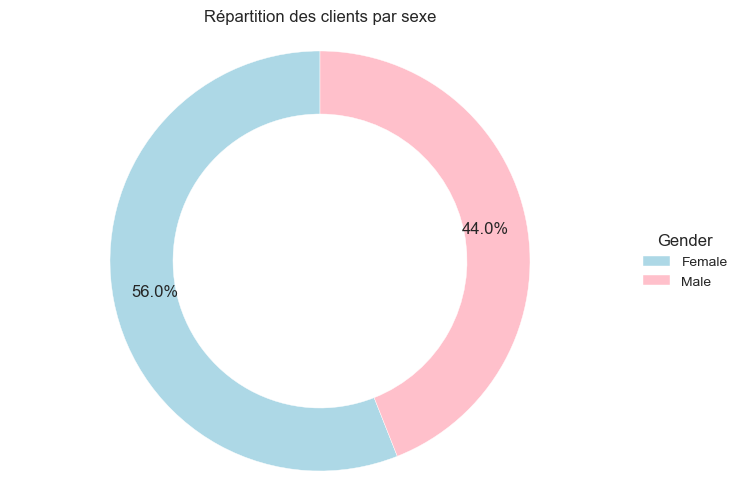

In [388]:
# Nombre d'occurrences de chaque modalité dans la variable 'Gender'
gender_counts = df['Gender'].value_counts()

# Créer un diagramme circulaire en forme de donut
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'pink'],
        wedgeprops={'width':0.3},      # Ajouter un trou au centre
        pctdistance=0.80)              # Positionner le % à l'intérieur de la bande

plt.title("Répartition des clients par sexe")
plt.axis('equal')  # Assure un cercle parfait
plt.legend(gender_counts.index, loc='center left', bbox_to_anchor=(1, 0.5), title='Gender')
plt.show()



*commentaire* :  On observe que parmi les clients, les femmes sont plus nombreuses que les hommes 

###   I.3.2   Avec la variable "Age"

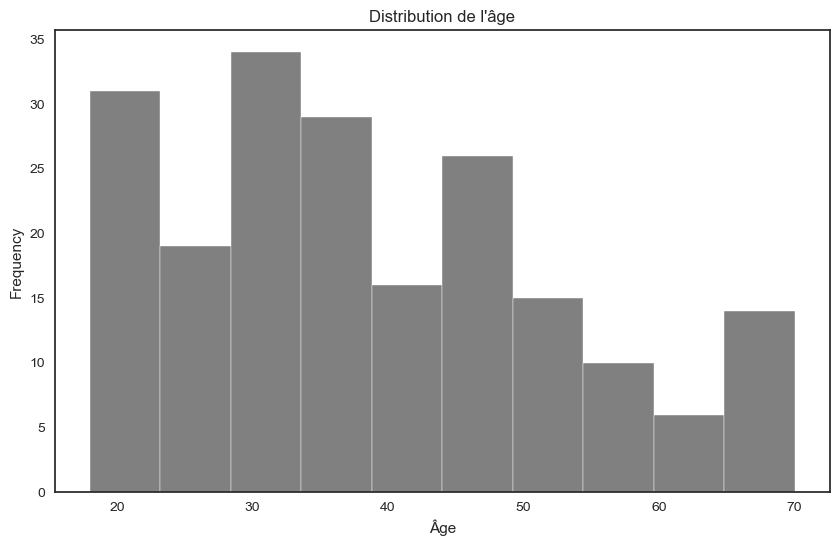

In [391]:
# Construction de l'histogramme pour la variable "Age"
plt.figure(figsize=(10, 6))
sns.set_style("white")
df['Age'].plot.hist(color='gray', bins=10)
plt.xlabel('Âge')
plt.title('Distribution de l\'âge')
plt.show()


### I.3.3 Avec la variable revenu annuel (Annual Income)

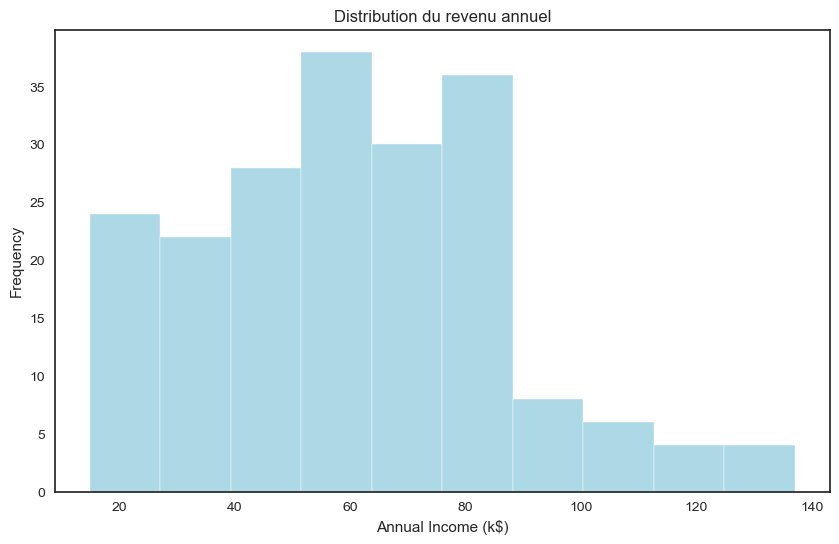

In [393]:
# Construction de l'histogramme pour la variable "Age"
plt.figure(figsize=(10, 6))
sns.set_style("white")
df['Annual Income (k$)'].plot.hist(color='lightblue', bins=10)
plt.xlabel('Annual Income (k$)')
plt.title('Distribution du revenu annuel')
plt.show()

### I.3.3 Avec la variable score de dépenses (Annual Income)

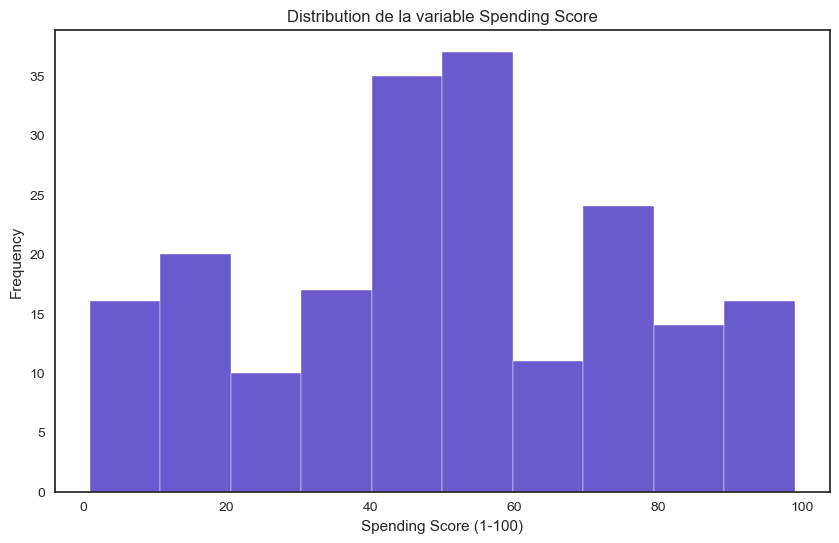

In [395]:
# Histogramme pour la variable 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
df['Spending Score (1-100)'].plot.hist(color='#6A5ACD', bins=10)  # Choisir un nombre de bins
plt.xlabel('Spending Score (1-100)')
plt.title('Distribution de la variable Spending Score')
plt.show()



### I.3.4 Histogrammes et courbes de densité

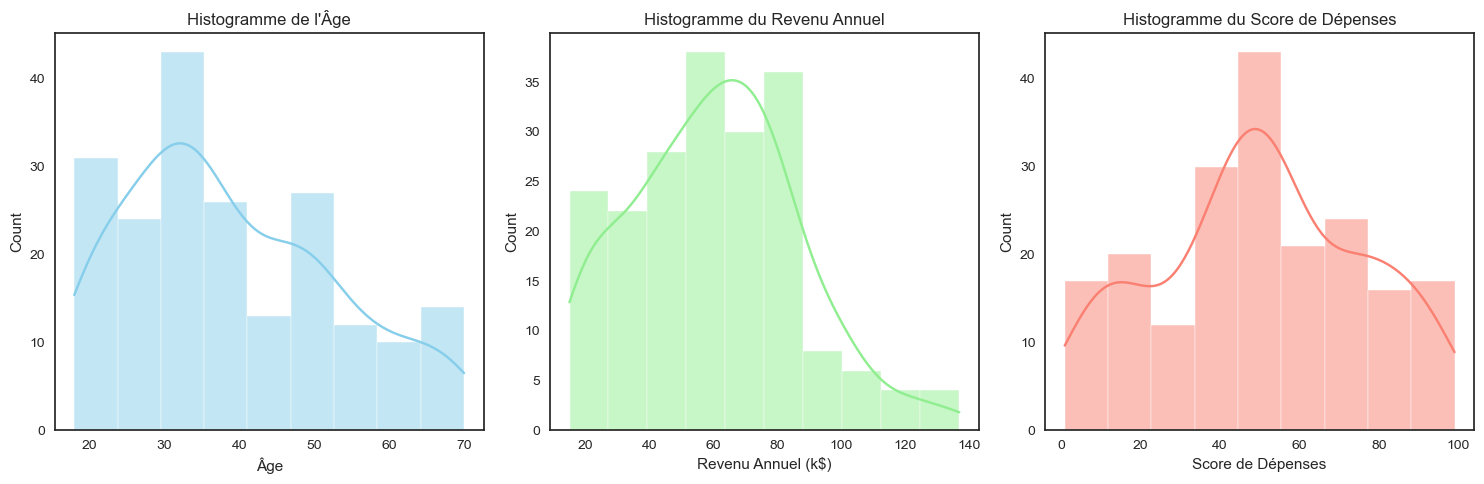

In [397]:
#  Histogrammes et courbes de densité 
plt.figure(figsize=(15, 5))

# Histogramme pour les variables "Age"
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Histogramme de l\'Âge')
plt.xlabel('Âge')

# Histogramme pour 'Annual Income (k$)'
plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='lightgreen')
plt.title('Histogramme du Revenu Annuel')
plt.xlabel('Revenu Annuel (k$)')

# Histogramme pour 'Spending Score (1-100)'
plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, color='salmon')
plt.title('Histogramme du Score de Dépenses')
plt.xlabel('Score de Dépenses')

plt.tight_layout()
plt.show()


L'analyse des distributions d'âge, de revenu annuel et de score de dépenses révèle des profils distincts. **L'âge** est asymétrique positivement, avec une concentration de jeunes adultes autour de 20-30 ans et des indications de sous-groupes démographiques autour de 35-50 ans, impliquant une population hétérogène. Le **revenu annuel** présente une distribution unimodale, quasi normale, centrée autour de 60-70 (k$), dénotant une relative homogénéité économique de la majorité des individus de l'échantillon. En revanche, le **score de dépenses** est clairement bimodal, voire multimodale, avec des pics prononcés autour de 20-30 et 40-60. Cette multimodalité forte indique l'existence de segments comportementaux distincts de consommateurs. globalement, ces distributions sont fondamentales pour comprendre la structure des données et orienter des analyses de segmentation ou des modélisations prédictives plus avancées.

## I.4 Analyses descriptives bivariées

## I.4.1 Distribution par sexe 

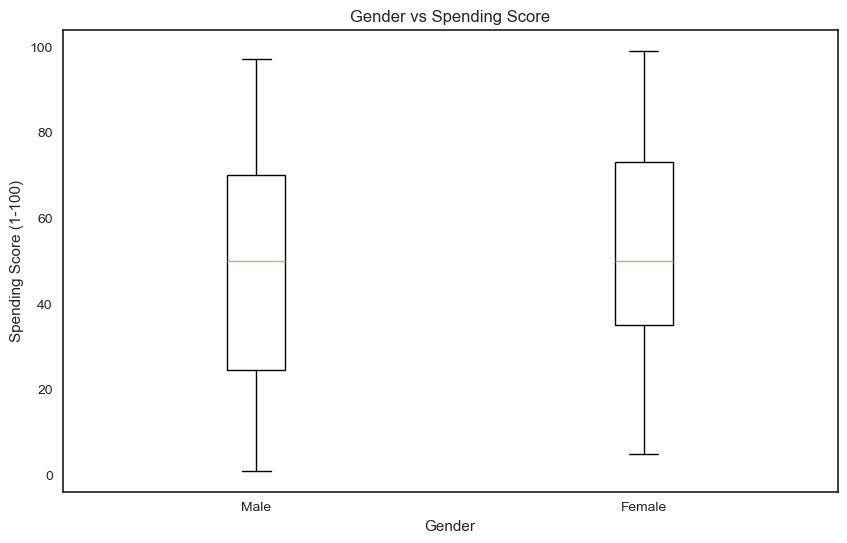

In [401]:
# Définir le style de la visualisation
sns.set_style("white")

# Créer la figure
plt.figure(figsize=(10, 6))

# Créer un boxplot pour la variable "Spending Score" selon le sexe
plt.boxplot([df[df['Gender'] == 'Male']['Spending Score (1-100)'],
             df[df['Gender'] == 'Female']['Spending Score (1-100)']])

plt.xticks([1, 2], ['Male', 'Female']) # Ajout de labels pour l'axe X
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.title('Gender vs Spending Score')
plt.show()


Le boxplot ci-dessus compare la distribution du Spending Score (score de dépenses) entre hommes et femmes. On observe que les médianes sont proches, ce qui implique une tendance centrale quasi similaire. Toutefois, la dispersion est légèrement plus élevée chez les femmes, traduisant une plus grande variabilité des comportements de dépenses dans ce groupe. Les amplitudes des scores sont comparables, avec des valeurs extrêmes semblables dans les deux groupes. L'absence apparente de valeurs aberrantes indique une distribution relativement homogène. Ce constat suggère qu'en moyenne, le sexe n'exerce pas d'effet marqué sur le score de dépenses, mais que la diversité des profils est un peu plus prononcée chez les clientes. Une analyse statistique complémentaire (ex : test de Mann-Whitney) permettrait de vérifier la significativité de cette différence.


### I.4.2 Test de Mann-Whitney-Wilcoxon (aussi appelé Wilcoxon rank-sum test)


In [404]:

male_scores = df[df['Gender'] == 'Male']['Spending Score (1-100)']
female_scores = df[df['Gender'] == 'Female']['Spending Score (1-100)']

# Test bilatéral (alternative='two-sided')
stat, p_value = mannwhitneyu(male_scores, female_scores, alternative='two-sided')

print(f"Statistique de test : {stat}")
print(f"Valeur p : {p_value}")


Statistique de test : 4697.5
Valeur p : 0.5712794188160656


H₀ : Les distributions des scores de dépenses des hommes et des femmes sont identiques.

Étant donné que cette valeur p est largement supérieure au seuil de significativité usuel de 5 % (α = 0,05), on ne rejette pas l’hypothèse nulle d’égalité des distributions des scores de dépenses entre hommes et femmes. Autrement dit, aucune différence statistiquement significative n’est détectée entre les comportements de dépenses des deux genres dans cet échantillon. Ce résultat corrobore la proximité des médianes observées sur le boxplot et suggère que les variations relevées relèvent davantage d’une dispersion interne que d’un effet discriminant du sexe


### I.4.3 Pairplot ou Matrix Plot des variables

Affiche la distribution entre paire de variables.

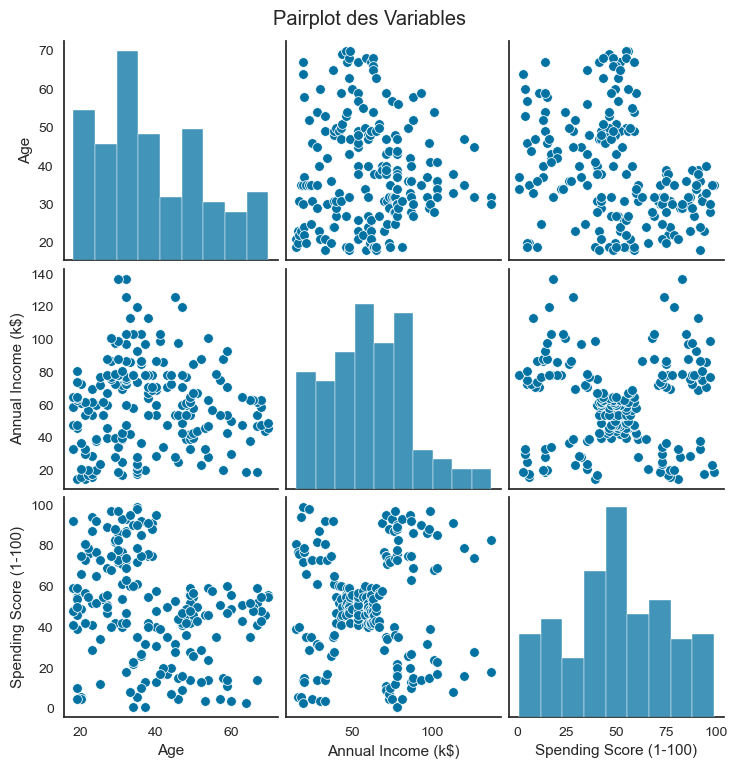

In [407]:
# Pairplot pour "Age", "Annual Income (k$)" et "Spending Score (1-100)"
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot des Variables', y=1.02)
plt.show()

Le pairplot présenté illustre les relations bivariées entre l’âge, le revenu annuel et le score de dépenses  (de 1 à 100).  Les histogrammes en diagonale permettent d’observer la distribution marginale de chaque variable. On remarque que l’âge des clients est majoritairement concentré entre 20 et 40 ans, tandis que le revenu annuel présente une répartition relativement homogène jusqu’à 100 k , avec un léger pic autour de 75 k$ . Le score de dépenses affiche, quant à lui, une distribution multimodale, suggérant l’existence de sous-groupes dans la population étudiée.

Sur les nuages de points croisés, aucune corrélation linéaire forte n’apparaît entre l’âge et le score de dépenses, ce qui traduit une indépendance apparente entre ces deux variables dans cet échantillon. De même, le lien entre revenu annuel et score de dépenses semble faible, bien que l’on note une dispersion plus importante des scores pour les revenus intermédiaires (50–80 k$). Enfin, le graphe croisé entre âge et revenu annuel ne laisse entrevoir aucune tendance systématique, ce qui pourrait indiquer une hétérogénéité des revenus à tous les âges.

Ces résultats impliquent, au plan exploratoire, l’absence de relation linéaire forte entre les variables considérées, justifiant le recours à des méthodes de classification mieux structurer cette population.


## I.4.4 Matrice de correlation

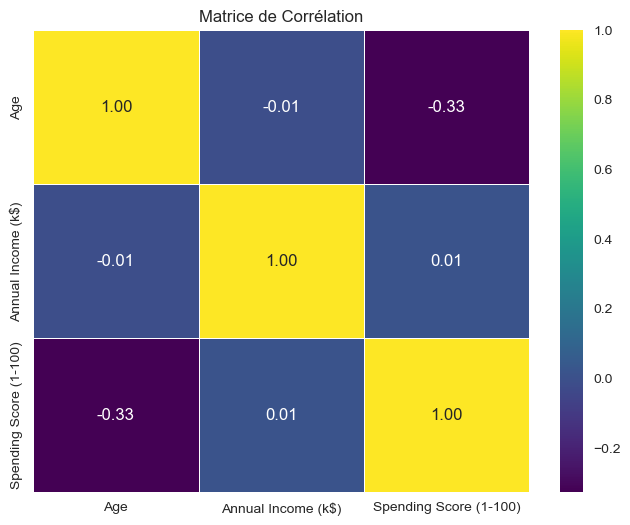

In [410]:

# Calcul de la matrice de corrélation
corr_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

L’analyse de la matrice de corrélation révèle l’absence quasi totale de relation linéaire entre l’âge et le revenu annuel (r = 0,00), ce qui indique que dans cet échantillon, les revenus sont répartis de manière homogène indépendamment de l’âge des individus. En revanche, une corrélation négative modérée (r = -0,33) est observée entre l’âge et le score de dépenses. Cela suggère qu’en moyenne, les clients plus jeunes ont tendance à présenter des scores de dépenses plus élevés, tandis que les individus plus âgés dépensent moins.

Entre le revenu annuel et le score de dépenses, la corrélation est quasiment nulle (r = 0,01), montrant qu’il n’existe pas de relation linéaire entre le niveau de revenu et le comportement de consommation dans cet échantillon. Ce résultat inattendu invite à envisager des facteurs contextuels susceptibles de mieux expliquer les comportements de dépense.

Infine, les résultats de la matrice de corrélation confirment les observations visuelles du pairplot. Par consequent, les techniques de segmentation non supervisée (clustering)  s'avèrent pertinentes pour mieux comprendre les profils sous-jacents et distinguer les groupes au sein de la population.

## I.5 Standardisation des données

In [413]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [414]:
cols_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = df.copy()

In [415]:
df_scaled[cols_to_scale] = scaler.fit_transform\
(df[cols_to_scale])

In [416]:
df_scaled[cols_to_scale].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [417]:
df_scaled=df_scaled[cols_to_scale]
df_scaled.head(3)

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


# <span style="color:blue"> II. MODELISATION </span>

Dans cette partie, l’objectif est d’identifier des groupes homogènes d’individus ou d’observations au sein de la base de données à l’aide de méthodes de clustering. Pour cela, plusieurs algorithmes non supervisés sont mobilisés, notamment K-means, le clustering hiérarchique et DBSCAN. Chaque méthode repose sur des logiques de partition différentes, ce qui permet de comparer la cohérence et la pertinence des segments obtenus. Il s’agira de déterminer le nombre optimal de clusters lorsque nécessaire, d’analyser la composition des groupes formés et d’interpréter les résultats pour dégager des profils caractéristiques. Des métriques d’évaluation comme le score de silhouette ou l’analyse visuelle des regroupements seront utilisées pour appuyer la qualité des classifications obtenues.

## II.1. Clustering Hiérarchique (Agglomératif)

### II.1.1 Dendrogram pour avoir une idée des cluster possible

Le dendrogramme ci-dessous représente la hiérarchie des regroupements des individus à l’aide de la méthode de classification ascendante hiérarchique (CAH), basée sur une mesure de distance  et un critère de liaison ici "Ward". Chaque nœud représente la fusion de deux groupes, et l’axe vertical indique la distance à laquelle la fusion a eu lieu. Plus la hauteur de la jonction est élevée, plus les groupes fusionnés sont dissemblables.

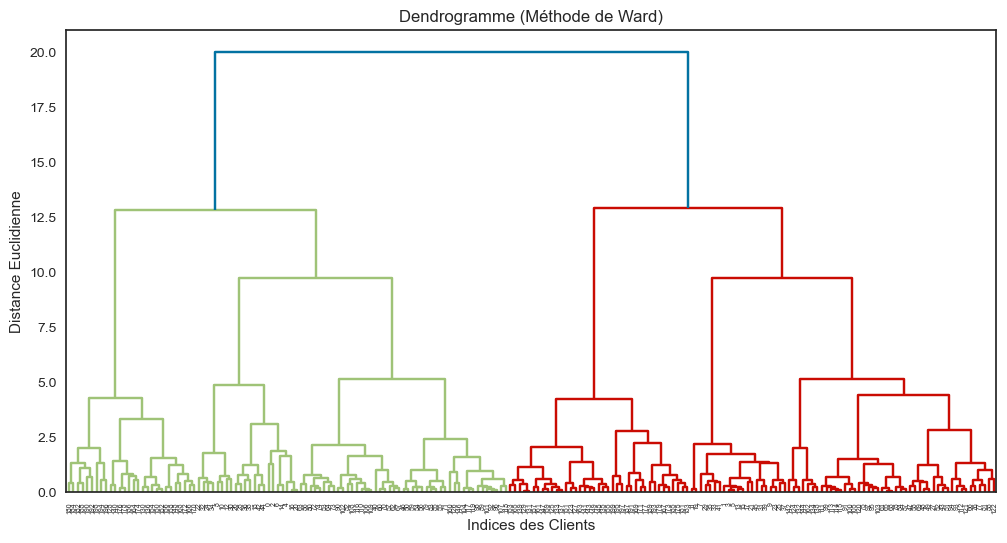

In [423]:

plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], method='ward'))
plt.title("Dendrogramme (Méthode de Ward)")
plt.xlabel("Indices des Clients")
plt.ylabel("Distance Euclidienne")
plt.show()

### II.1.2 Dendrogram pour representer 20 clusters

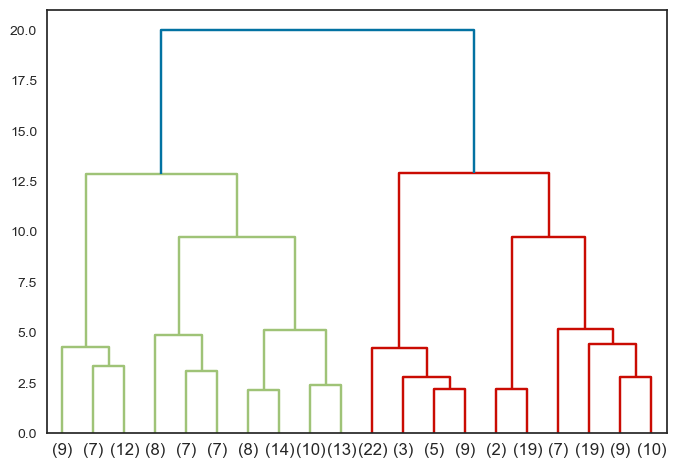

In [425]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
Z = linkage(df_scaled[['Age','Annual Income (k$)', 'Spending Score (1-100)']], 'ward') # use ward linkage
dn = dendrogram(Z, truncate_mode='lastp', p=20) # show last 10 clusters
plt.show()

Dans ce dendrogramme, on observe un **saut important au niveau de la hauteur 5 à 12.5**. Cela suggère que **le découpage en 6 grands clusters est pertinent**.
Mais dans la suite nous utiliserons la methode du silouhette score pour determiner le nombre de cluster optimal.

### II.1.2 Visualisation des clusters à travers la reduction de dimension PCA

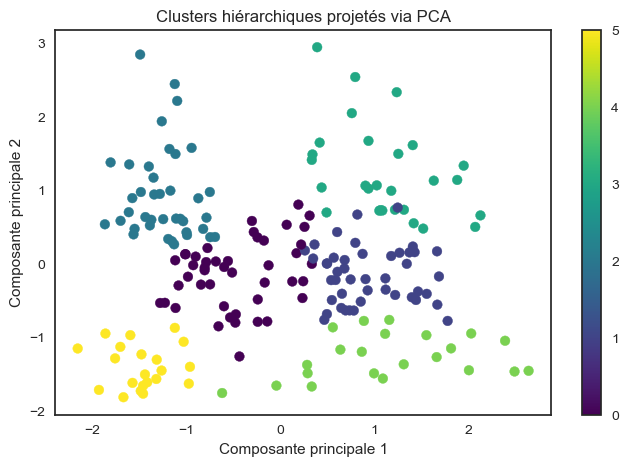

In [428]:

# Clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=6)  # choisis le nombre de clusters selon ton cas
cluster_labels = clustering.fit_predict(df_scaled)

# PCA pour visualisation 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

# Affichage
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters hiérarchiques projetés via PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar()
plt.show()


L'affichage des clusters de la méthode du clustering hierarchique par le PCA permet de voir une distinction des 6 groupes.Mais quelques individus même s'ils sont peu qui se retrouve dans deux groupe. Est ce un problème de distinction par l'algorithme ou la methode PCA qui n'arrive pas à bien afficher de manière distinct les groupes? à la suite nous allons utiliser la TSEN pour afficher les clusters afin de repondre à cette question.

### II.1.3 Visualisation des clusters à travers TSNE

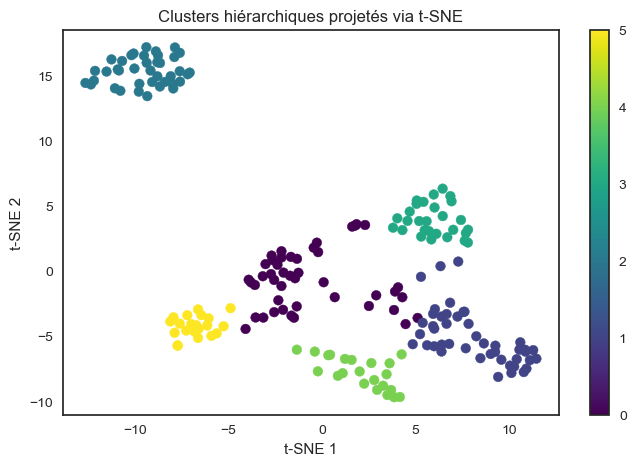

In [431]:

# Clustering hiérarchique
clustering = AgglomerativeClustering(n_clusters=6)  # choisis le nombre de clusters selon ton cas
cluster_labels = clustering.fit_predict(df_scaled)

# t-SNE pour visualisation 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Affichage
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters hiérarchiques projetés via t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()


Par la méthode TSNE, on voit bien que les groupes sont bien distinct. On peut dire de manière graphique que le clustering hierarchique a une bonne qualité de segmentation des groupes. Dans la suite nous allons evaluer la performance du modèle .

### II.1.4 Recherche du nombre optimal de cluster à travers un algo

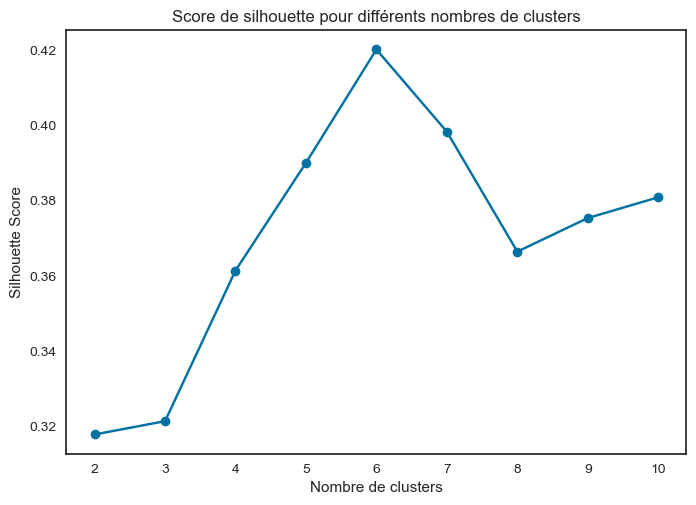

In [434]:
scores = []
for k in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = cluster.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    scores.append(score)

# Tracé du score en fonction du nombre de clusters
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()


A travers ce graphique on voit bien que le nombre de cluster optimal est 6 ce qui vient confirmer ce qui a été trouver à travers le dindrogram

### II.1.5 Evaluation des performances du modèle

In [437]:
# 3. Évaluation des performances
silhouette = silhouette_score(df_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(df_scaled, cluster_labels)

# 4. Affichage clair
print(" Évaluation du clustering hiérarchique")
print(f"- Silhouette Score        : {silhouette:.3f} (proche de 1 = bien)")
print(f"- Davies-Bouldin Index    : {davies_bouldin:.3f} (proche de 0 = bien)")
print(f"- Calinski-Harabasz Score : {calinski_harabasz:.3f} (plus élevé = bien)")

 Évaluation du clustering hiérarchique
- Silhouette Score        : 0.420 (proche de 1 = bien)
- Davies-Bouldin Index    : 0.852 (proche de 0 = bien)
- Calinski-Harabasz Score : 127.986 (plus élevé = bien)


## II.2. DBSCAN

In [439]:
# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps si besoin
cluster_labels = dbscan.fit_predict(df_scaled)

# 3. Affichage du nombre de clusters trouvés (hors bruit)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print(f"Nombre de clusters trouvés : {n_clusters}")
print(f"Nombre de points considérés comme bruit : {n_noise}")



Nombre de clusters trouvés : 6
Nombre de points considérés comme bruit : 60


## II.2.1 Visualisation des clusters à travers la reduction de dimension PCA

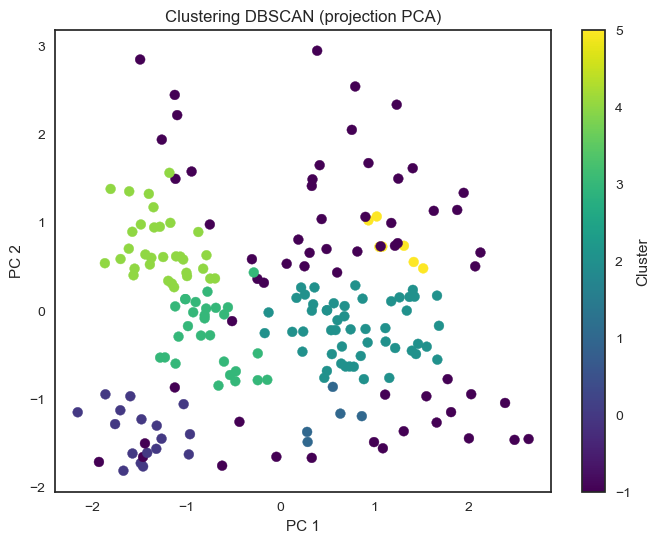

In [441]:

# 5. Visualisation (option : PCA pour projeter)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Clustering DBSCAN (projection PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Cluster')
plt.show()


L'affichage des clusters de la méthode DBSCAN par le PCA permet de voir mais difficilemnt les 6 groupes.Mais quelques individus se retrouve dans deux groupes. Est ce un problème de distinction par l'algorithme ou la methode PCA qui n'arrive pas à bien afficher de manière distinct les groupes? à la suite nous allons utiliser la TSEN pour afficher les clusters afin de repondre à cette question.

### II.2.2 Visualisation des clusters à travers TSNE

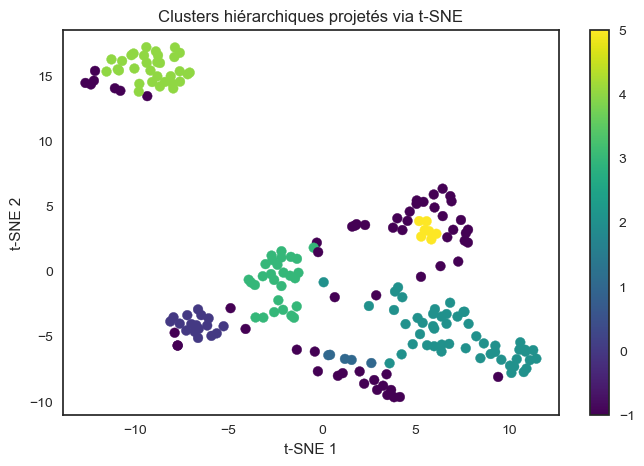

In [444]:


# t-SNE pour visualisation 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Affichage
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters hiérarchiques projetés via t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()

Avec TSNE, les clusters se forme mieux que dans le cas du PCA mais il reste toujours un mauvais regroupement des clusters. Celà pourrait traduire l'incapacité de l'algorithme DBSCAN à identifier les grouped clairement.

## II.2.3 Evaluation des performances du modèle

In [447]:

# 4. Évaluation (uniquement si au moins 2 clusters)
if n_clusters > 1:
    silhouette = silhouette_score(df_scaled, cluster_labels)
    davies_bouldin = davies_bouldin_score(df_scaled, cluster_labels)
    calinski_harabasz = calinski_harabasz_score(df_scaled, cluster_labels)

    print("\n Évaluation du clustering DBSCAN")
    print(f"- Silhouette Score        : {silhouette:.3f}")
    print(f"- Davies-Bouldin Index    : {davies_bouldin:.3f}")
    print(f"- Calinski-Harabasz Score : {calinski_harabasz:.3f}")
else:
    print(" DBSCAN a détecté moins de 2 clusters. Évaluation non applicable.")



 Évaluation du clustering DBSCAN
- Silhouette Score        : 0.185
- Davies-Bouldin Index    : 1.757
- Calinski-Harabasz Score : 34.071


## II.3 L'algorithme du K-means

In [449]:

warnings.filterwarnings("ignore", category=UserWarning)
# 2. K-Means clustering
k = 6  # Choisis le nombre de clusters ici
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

### II.3.1 Visualisation des clusters à travers la reduction de dimension PCA

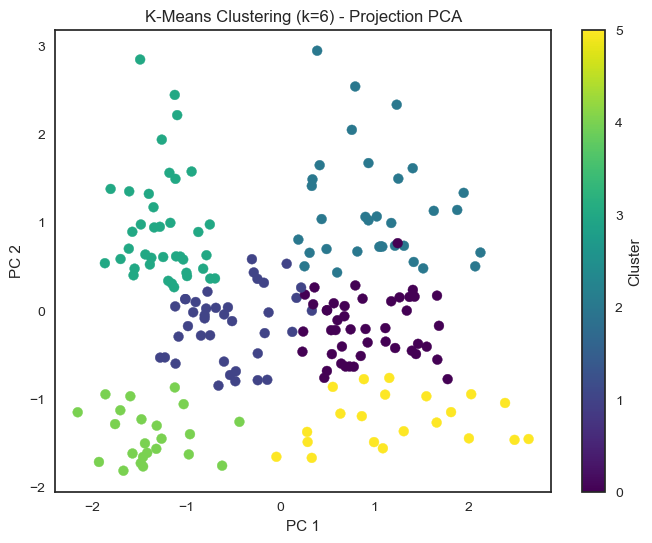

In [451]:

warnings.filterwarnings("ignore", category=UserWarning)



# 4. Visualisation avec PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f"K-Means Clustering (k={k}) - Projection PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label='Cluster')
plt.show()


le KMEANS ici arrive à bien identifier les clusters moyennant quelques supperposition d'individu dans des groupes. Mais cela pourrait s'expliquer par la representation PCA donc nous allons utiliser TSNE pour representer les resultats voir si les petites erreurs de classification sont dues à la representation PCA ou des erreurs de KMEANS.

### II.3.2 Visualisation des clusters à travers TSNE

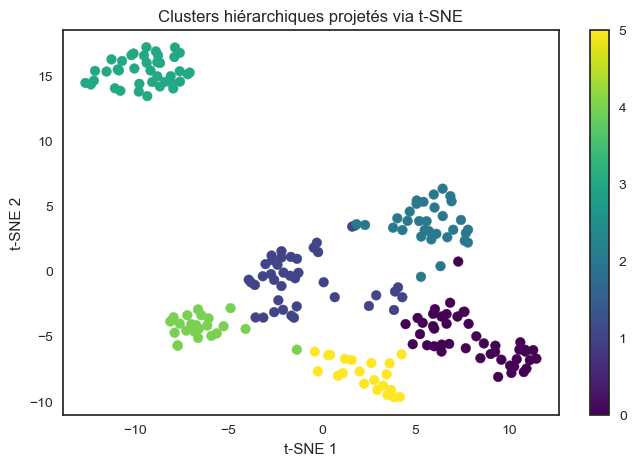

In [454]:
# Clustering hiérarchique
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# t-SNE pour visualisation 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_scaled)

# Affichage
plt.figure(figsize=(8, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters hiérarchiques projetés via t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar()
plt.show()

Globalement, avec TSNE on constate une bonne separation des groupes. Donc les erreurs de classification constaté avec PCA pourrait s'expliqué par la representation de PCA même.Mais en comparant  les resultats des Silhouette Score qui est notre metrique principale dans la suite nous allons choisir le meilleur modèle.

### II.3.3 Recherche du nombre optimal de cluster à travers un algo

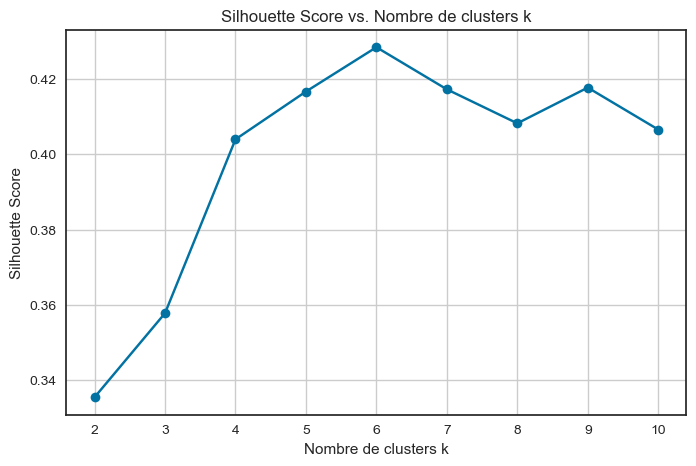

In [457]:

warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# 2. Paramètres de la boucle
k_values = range(2, 11)
silhouette_scores = []

# 3. Boucle sur k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    
    # Silhouette Score
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# 4. Affichage du Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. Nombre de clusters k")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


Le nombre de cluster optimal reste toujours 6 avec silhouette score elévé.

## II.3.4 Evaluation des performances du modèle

N

In [461]:

# 3. Évaluation du modèle
k=6
silhouette = silhouette_score(df_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(df_scaled, cluster_labels)
calinski_harabasz = calinski_harabasz_score(df_scaled, cluster_labels)

print(f" K-Means avec k = {k}")
print(f"- Silhouette Score        : {silhouette:.3f}")
print(f"- Davies-Bouldin Index    : {davies_bouldin:.3f}")
print(f"- Calinski-Harabasz Score : {calinski_harabasz:.3f}")


 K-Means avec k = 6
- Silhouette Score        : 0.428
- Davies-Bouldin Index    : 0.825
- Calinski-Harabasz Score : 135.102


### Conclusion partielle
##### A la suite de l'évaluation des performances du modèle , on remarque que l'algorithme du K-Means affiche le score le plus elévé donc nous allons optimiser ses hyperparamètres dans la suite afin d'augmenter sa performance et faire l'analyse des personas.

# <span style="color:blue"> III. Optimisation des hyperparamètres du meilleurs modèle </span>

In [464]:

# 1. Préparation des données
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_scaled = StandardScaler().fit_transform(X)

# 2. Meilleur nombre de clusters (déjà trouvé)
# 3. Paramètres à tester
best_k = 6  # Remplace par ton meilleur k si différent

init_options = ['k-means++', 'random']
n_init_options = [10,20]
max_iter_options = [300]
#algorithm_options = ['lloyd', 'elkan']
algorithm_options = ['elkan']

# 4. Stocker les résultats
results = []

# 5. Grid search manuel
for init, n_init, max_iter, algo in product(init_options, n_init_options, max_iter_options, algorithm_options):
    try:
        model = KMeans(
            n_clusters=best_k,
            init=init,
            n_init=n_init,
            max_iter=max_iter,
            algorithm=algo,
            random_state=42
        )
        labels = model.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        results.append({
            'init': init,
            'n_init': n_init,
            'max_iter': max_iter,
            'algorithm': algo,
            'Silhouette Score': round(silhouette, 4)
        })
    except Exception as e:
        print(f" Erreur avec {init}, {n_init}, {max_iter}, {algo} : {e}")

# 6. Affichage des meilleurs résultats
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

print("\n Top 10 meilleures combinaisons :")
print(results_df.head(10).to_string(index=False))



 Top 10 meilleures combinaisons :
     init  n_init  max_iter algorithm  Silhouette Score
k-means++      10       300     elkan            0.4284
   random      20       300     elkan            0.4284
k-means++      20       300     elkan            0.4274
   random      10       300     elkan            0.4269


# <span style="color:blue"> IV. Analyse des personas </span>

## IV.1 Formation et analyse des clusters

In [467]:

# 1. Sélection des variables
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Clustering avec KMeans (k = 3 ou le meilleur nombre trouvé)
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Analyse des personas
personas = df.groupby('Cluster').agg({
    'Age': ['mean', 'min', 'max'],
    'Annual Income (k$)': ['mean', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'min', 'max'],
    'Cluster': 'count'  # pour compter le nombre d'individus
})

# 5. Nettoyage des noms de colonnes
personas.columns = ['_'.join(col).strip() for col in personas.columns.values]
personas = personas.rename(columns={'Cluster_count': 'Effectif'}).reset_index()

# 6. Affichage des résultats
print(" Analyse des personas :")
print(personas)


 Analyse des personas :
   Cluster   Age_mean  Age_min  Age_max  Annual Income (k$)_mean  \
0        0  56.333333       43       70                54.266667   
1        1  26.794872       18       40                57.102564   
2        2  41.939394       19       59                88.939394   
3        3  32.692308       27       40                86.538462   
4        4  25.000000       18       35                25.260870   
5        5  45.523810       20       67                26.285714   

   Annual Income (k$)_min  Annual Income (k$)_max  \
0                      38                      79   
1                      39                      76   
2                      71                     137   
3                      69                     137   
4                      15                      39   
5                      16                      39   

   Spending Score (1-100)_mean  Spending Score (1-100)_min  \
0                    49.066667                          35   
1  


**Cluster 0 – Seniors à revenu moyen et consommation modérée
Âge moyen : 56 ans (43 à 70 ans) ou encore seniors stable**

Revenu moyen : 54k$ (38k$–79k$)

Score de dépense : 49

Effectif : 45 personnes

Ce groupe est composé d'adultes mûrs voire de jeunes retraités, avec un niveau de revenu stable et un comportement d'achat équilibré. Ils peuvent représenter des personnes ayant atteint une certaine sécurité financière et qui consomment de manière raisonnée.
Cible potentielle pour des services liés au bien-être, à la santé, aux voyages organisés ou à la stabilité financière.



**Cluster 1 – Jeunes actifs à revenu moyen et dépenses modérées
Âge moyen : 27 ans (18 à 40 ans)**

Revenu moyen : 57k$ (39k$–76k$)

Score de dépense : 48

Effectif : 39 personnes
 Il s’agit de jeunes adultes avec un revenu moyen à confortable, ayant un comportement d’achat équilibré. Ce sont probablement de jeunes professionnels ou étudiants aisés.

 **Cluster 2 – Adultes à revenu élevé mais faibles dépenses
Âge moyen : 42 ans (19 à 59 ans)**

Revenu moyen : 89k$ (71k$–137k$)

Score de dépense : 17 (faible)

Effectif : 33 personnes
 Ce groupe inclut des adultes actifs, aisés, mais peu dépensiers. Peut correspondre à des personnes épargnantes ou peu sensibles à la consommation de luxe.

 **Cluster 3 – Jeunes adultes riches et très dépensiers
Âge moyen : 33 ans (27 à 40 ans)**

Revenu moyen : 87k$ (69k$–137k$)

Score de dépense : 82 (élevé)

Effectif : 39 personnes
 Ce sont des jeunes adultes très aisés et grands consommateurs. Ils représentent une cible privilégiée pour des produits haut de gamme ou expériences premium.

**Cluster 4 – Très jeunes à faible revenu mais très dépensiers
Âge moyen : 25 ans (18 à 35 ans)**

Revenu moyen : 25k$ (15k$–39k$)

Score de dépense : 78

Effectif : 23 personnes
 Jeunes aux revenus modestes, mais avec une forte propension à dépenser. Potentiellement impulsifs ou sensibles à la mode, aux tendances. Intéressant pour des produits abordables à fort attrait marketing.

**Cluster 5 – Adultes à faible revenu et faible consommation
Âge moyen : 46 ans (20 à 67 ans)**

Revenu moyen : 26k$ (16k$–39k$)

Score de dépense : 19

Effectif : 21 personnes
 Ce sont des adultes à faible pouvoir d’achat, avec une consommation réduite. Ils peuvent représenter une population plus conservatrice, économe ou en difficulté.

## IV.2 Representation de proportions des cluster par sexe

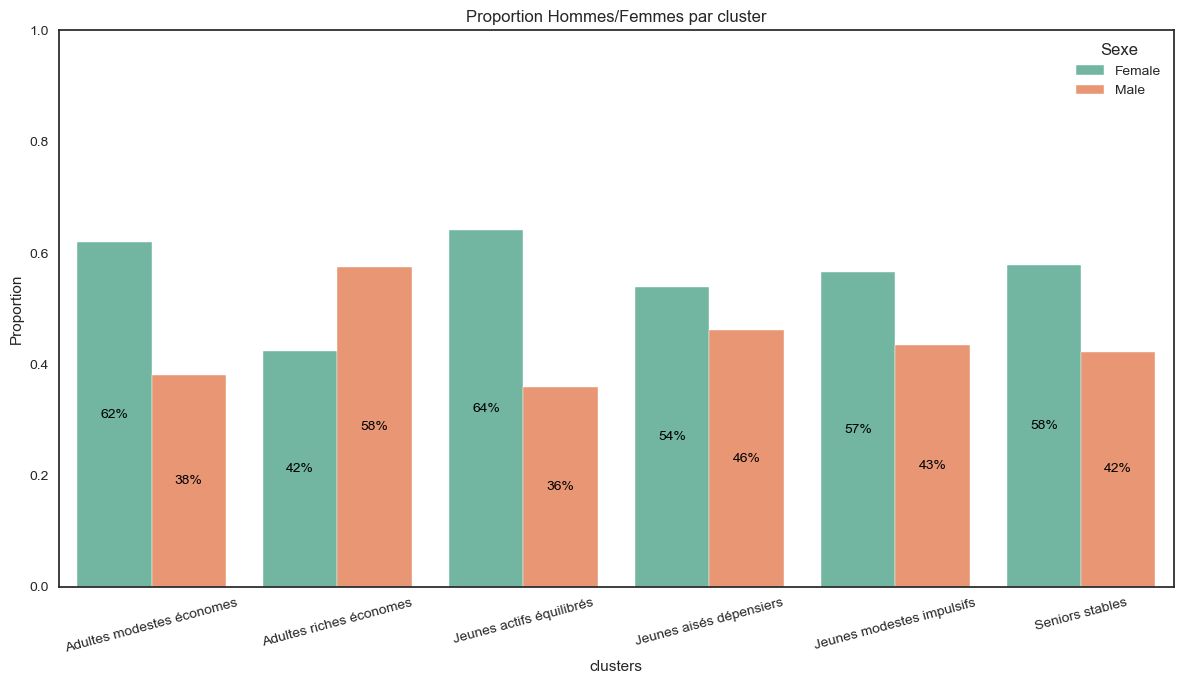

In [470]:


# 1. Dictionnaire des personas
personas = {
    0: "Seniors stables",
    1: "Jeunes actifs équilibrés",
    2: "Adultes riches économes",
    3: "Jeunes aisés dépensiers",
    4: "Jeunes modestes impulsifs",
    5: "Adultes modestes économes"
}

# 2. Remplacer les numéros de cluster par les labels dans le DataFrame
df['ClusterLabel'] = df['Cluster'].map(personas)

# 3. Regroupement par Cluster et Genre
cluster_gender = df.groupby(['ClusterLabel', 'Gender']).size().reset_index(name='count')

# 4. Calcul des proportions
cluster_gender['proportion'] = cluster_gender.groupby('ClusterLabel')['count'].transform(lambda x: x / x.sum())

# 5. Affichage du graphique
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=cluster_gender,
    x='ClusterLabel',
    y='proportion',
    hue='Gender',
    palette='Set2'
)

# 6. Ajouter les pourcentages sur les barres
for container in barplot.containers:
    barplot.bar_label(container, labels=[f'{w:.0%}' for w in container.datavalues], label_type='center', fontsize=10, color='black')

# 7. Mise en forme
plt.title('Proportion Hommes/Femmes par cluster')
plt.xlabel('clusters')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(title='Sexe')
plt.tight_layout()
plt.show()


# <span style="color:blue"> V. Répresentation en 3D des clusters à travers le meilleur modèle Kmeans</span>

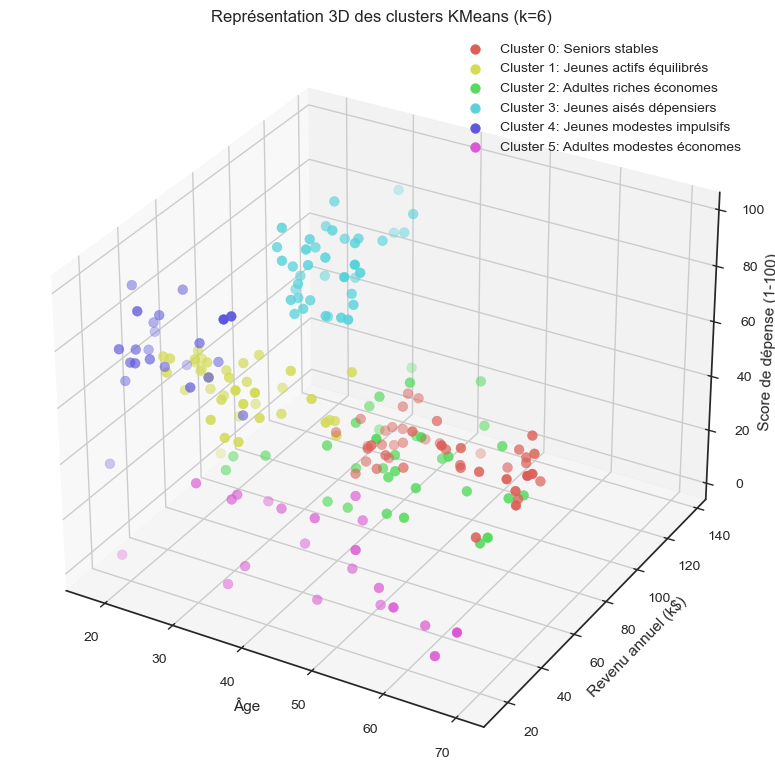

In [472]:

# 1. Réentraîner le meilleur modèle avec les meilleurs hyperparamètres trouvés
best_params = results_df.iloc[0]  # Première ligne du DataFrame trié

best_model = KMeans(
    n_clusters=best_k,
    init=best_params['init'],
    n_init=int(best_params['n_init']),
    max_iter=int(best_params['max_iter']),
    algorithm=best_params['algorithm'],
    random_state=42
)

df['Cluster'] = best_model.fit_predict(X_scaled)

# 2. Dictionnaire des personas
personas = {
    0: "Seniors stables",
    1: "Jeunes actifs équilibrés",
    2: "Adultes riches économes",
    3: "Jeunes aisés dépensiers",
    4: "Jeunes modestes impulsifs",
    5: "Adultes modestes économes"
}

# Si les étiquettes sont désordonnées, tu peux les réassigner manuellement ici :
# Mapping manuel (exemple, adapter en fonction de l'analyse)
# df['Persona'] = df['Cluster'].map({0: ..., 1: ..., etc.})
df['Persona'] = df['Cluster'].map(personas)

# 3. Affichage 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Couleurs
colors = sns.color_palette("hls", best_k)

for i in range(best_k):
    cluster_data = df[df['Cluster'] == i]
    ax.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f"Cluster {i}: {personas[i]}",
        color=colors[i],
        s=50
    )

ax.set_xlabel("Âge")
ax.set_ylabel("Revenu annuel (k$)")
ax.set_zlabel("Score de dépense (1-100)")
ax.set_title("Représentation 3D des clusters KMeans (k=6)")
ax.legend()
plt.tight_layout()
plt.show()


# <span style="color:blue"> VI. Enregistrement du meilleur modèle </span>

In [474]:

# Spécifie le nom du fichier de sauvegarde
filename = 'kmeans_model.dill'

# Ouvre le fichier en mode écriture binaire et enregistre le modèle
with open(filename, 'wb') as f:
    dill.dump(kmeans, f)

print(f"Modèle KMeans sauvegardé avec succès dans '{filename}'")



Modèle KMeans sauvegardé avec succès dans 'kmeans_model.dill'


# <span style="color:blue"> Conclusion </span>

L'analyse réalisée à travers le clustering KMeans a permis de segmenter les clients du Dubai Mall en six groupes distincts selon leur âge, revenu annuel et score de dépense. Cette segmentation a conduit à l'identification de profils types ou *personas*, facilitant une meilleure compréhension des comportements consommateurs.

Les visualisations en 2D et 3D, ainsi que les analyses de genre au sein des clusters, ont renforcé la lisibilité de cette segmentation. L’enregistrement du modèle final permet une réutilisation directe pour des prédictions futures ou des analyses complémentaires.

Ces résultats offrent ainsi des pistes intéressantes pour une stratégie marketing ciblée et personnalisée.